## Go Pokemon! What does the data talk about.

Chia Lin Chiu #47717533

Arham Newaz #

#### Introduction of the data

Like many people’s childhoods, we were crazy players of Pokémon game. However, we don't know whether the meaning behind the dataset is different from our previous perceptions of playing. First of all, there are complete dataset of the seven generations of pokemon on kaggle(Resource: https://www.kaggle.com/rounakbanik/pokemon). Dataset Pokemon.csv that we applied can be found on this website. There are 801 columns for each Pokemon, and each one is ranged from the against, abilities to speed, blood value, attack power...etc. 





#### Outline 

- Understand nature of the dataset 
- Trends by each generation 
- Correlation 
- Model comparison 
- Final goal:

In [117]:
# import statement
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import seaborn as sns
import math
import scipy.stats as sc
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
%matplotlib inline

import bs4

 #### Read file

 add a total column

In [118]:
Pokemon = pd.read_csv("./pokemon.csv") 
# This csv file is origin dataset from Kaggle.

Pokemon["total"] = (Pokemon["sp_attack"] +
                 Pokemon["sp_defense"] +
                 Pokemon["hp"] +
                 Pokemon["speed"]+
                 Pokemon["attack"]+
                 Pokemon["defense"])

#### Q1. What are the Pokemon stat differences/ trends from each generation? 

-   Our hypothesis floated in our mind: We think there is a stat “inflation” in each newer generation (newer pokemon genertaion is better than the old pokemon generation). 

    Lets see what is going on ...

In [119]:
# first, using generation column to set the DataFrame index.
# Because our purpose is to compare the different generations.

Pokemon_generation = Pokemon.set_index(["generation"])
Pokemon_generation
generation=pd.DataFrame(Pokemon_generation[Pokemon_generation.columns[33:39]])
generation


,sp_attack,sp_defense,speed,type1,type2,weight_kg
generation,,,,,,
1,65,65,45,grass,poison,6.9
1,80,80,60,grass,poison,13.0
1,122,120,80,grass,poison,100.0
1,60,50,65,fire,NaN,8.5
1,80,65,80,fire,NaN,19.0
...,...,...,...,...,...,...
7,107,101,61,steel,flying,999.9
7,59,31,109,grass,steel,0.1
7,97,53,43,dark,dragon,888.0


<AxesSubplot:xlabel='generation'>

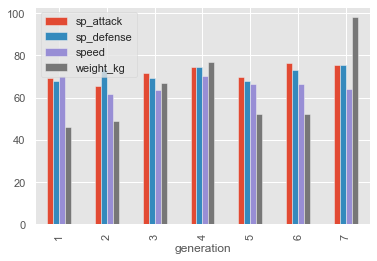

In [120]:
p1=generation.groupby(pd.Grouper(level="generation")).mean()
p1.plot.bar()

<AxesSubplot:xlabel='generation', ylabel='count'>

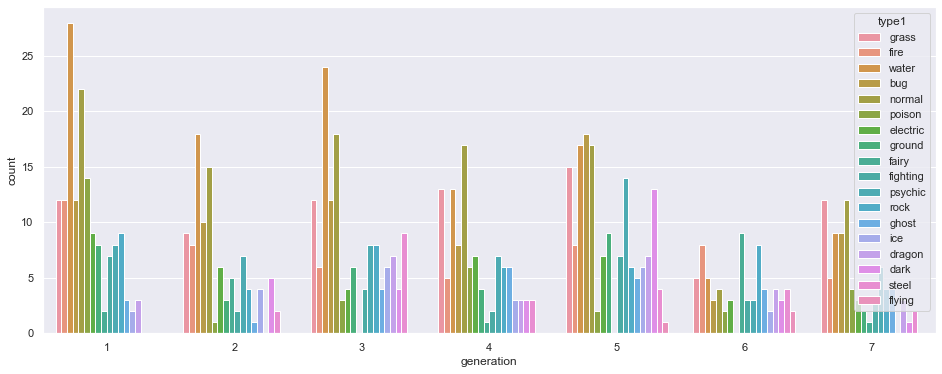

In [121]:
sns.set(font_scale=1)
plt.figure(figsize=(16,6))
sns.countplot(x="generation",hue="type1", data=Pokemon)

In [122]:
# type count
type_gen=generation.groupby("generation")["type1","type2"].count()
type_gen

C:\Users\Arham\AppData\Local\Temp/ipykernel_16320/1804468249.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  type_gen=generation.groupby("generation")["type1","type2"].count()


,type1,type2
generation,,
1,151,81
2,100,49
3,135,66
4,107,54
5,156,75
6,72,41
7,80,51


Text(0.5, 1.0, 'type count')

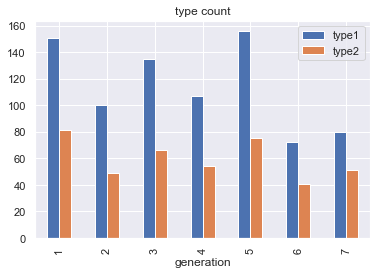

In [123]:
type_gen.plot.bar(subplots=False)
plt.title("type count")

Text(0.5, 1.0, 'box-and-whisker plot')

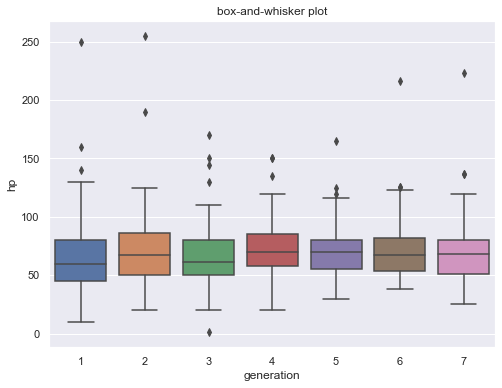

In [124]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='generation', y="hp", data=Pokemon)
plt.title('box-and-whisker plot')

<AxesSubplot:xlabel='generation', ylabel='speed'>

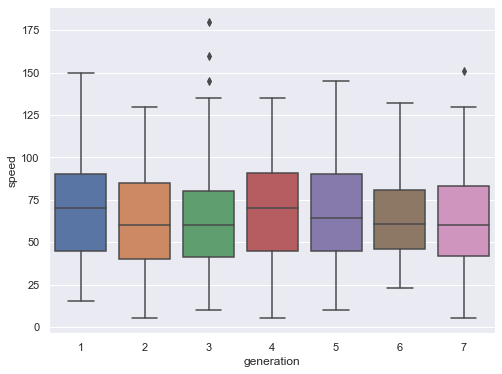

In [125]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='generation', y="speed", data=Pokemon)

In [126]:
gen1 = Pokemon[Pokemon['generation'] == 1]
gen2 = Pokemon[Pokemon['generation'] == 2]
gen3 = Pokemon[Pokemon['generation'] == 3]
gen4 = Pokemon[Pokemon['generation'] == 4]
gen5 = Pokemon[Pokemon['generation'] == 5]
gen6 = Pokemon[Pokemon['generation'] == 6]
gen7 = Pokemon[Pokemon['generation'] == 7]

In [127]:

print(gen1['hp'].corr(gen1['speed']))
print(gen2['hp'].corr(gen2['speed']))
print(gen3['hp'].corr(gen3['speed']))
print(gen4['hp'].corr(gen4['speed']))
print(gen5['hp'].corr(gen5['speed']))
print(gen6['hp'].corr(gen6['speed']))
print(gen7['hp'].corr(gen7['speed']))



-0.023154827714614343
0.15490296843431908
0.25394253674073497
0.22391746248714112
0.22416564097386785
0.29043893041413577
0.14946388972124558


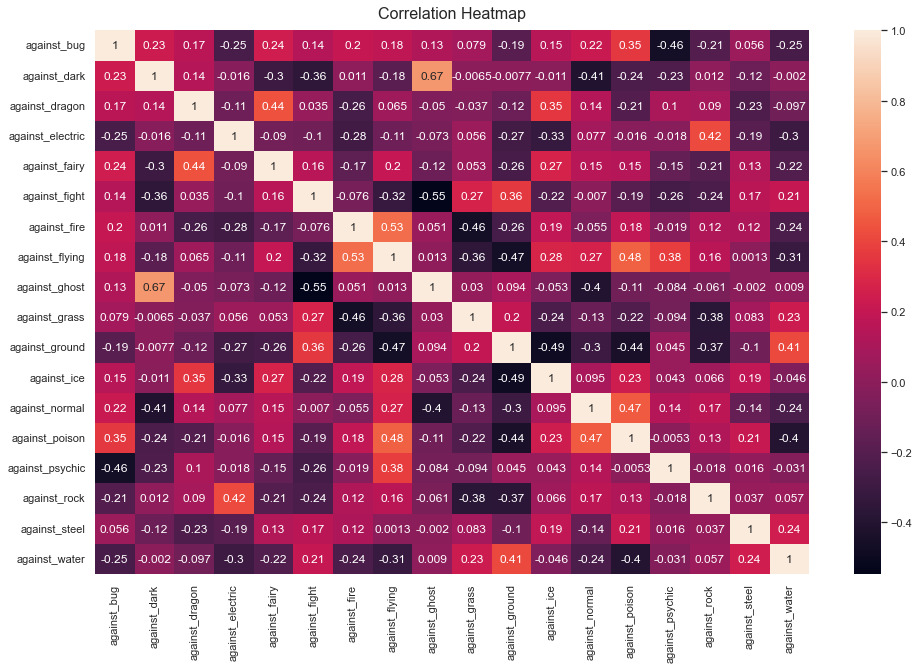

In [128]:
plt.figure(figsize=(16, 10))
against=Pokemon.iloc[:,1:19]
sns.heatmap(against.corr(),annot=True)

plt.title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

#### Q2. What are the key differences between a pokemon type and stats? 

   We assumed that Pokemon which has more than one type(own two types) has higher total stats(hp, speed, attack..etc)
   We will attempt to establish a theme of pokemon type and their distribution of stats.

In [129]:
#???????????


ok=Pokemon.fillna(0)
gen1 = ok[ok['generation'] == 1]
#data = gen1.set_index(["type1"])
#Pokemon_type1=pd.DataFrame(data)


onlytype1=gen1[gen1['type2'] == 0]

onlytype2=gen1[gen1['type2'] != 0]

print(onlytype1.total.describe())
print(onlytype2.total.describe())
#------- Gen 2 

gen2 = ok[ok['generation'] == 2]
data = gen2.set_index(["type1"])
Pokemon_type1=pd.DataFrame(data)


onlytype1for2=gen2[gen2['type2'] == 0]

onlytype2for2=gen2[gen2['type2'] != 0]

print(onlytype1for2.total.describe())
print(onlytype2for2.total.describe())

count     70.000000
mean     407.600000
std      113.019865
min      195.000000
25%      320.000000
50%      402.500000
75%      490.000000
max      780.000000
Name: total, dtype: float64
count     81.000000
mean     423.728395
std      111.784280
min      195.000000
25%      325.000000
50%      435.000000
75%      500.000000
max      640.000000
Name: total, dtype: float64
count     51.000000
mean     400.470588
std      115.588988
min      180.000000
25%      311.500000
50%      405.000000
75%      500.000000
max      610.000000
Name: total, dtype: float64
count     49.000000
mean     426.408163
std      125.741620
min      210.000000
25%      330.000000
50%      430.000000
75%      485.000000
max      700.000000
Name: total, dtype: float64


In [130]:
#???????2
edata=Pokemon.fillna(0)
allgentype1=edata[edata['type2'] == 0]
allgentype2= edata[edata['type2'] != 0]



print(allgentype2.base_total.describe())
print(allgentype1.base_total.describe())
print(edata.base_total.describe())

count    417.000000
mean     445.894484
std      119.354125
min      190.000000
25%      340.000000
50%      464.000000
75%      520.000000
max      780.000000
Name: base_total, dtype: float64
count    384.000000
mean     409.354167
std      116.235399
min      180.000000
25%      310.000000
50%      405.000000
75%      495.000000
max      780.000000
Name: base_total, dtype: float64
count    801.000000
mean     428.377029
std      119.203577
min      180.000000
25%      320.000000
50%      435.000000
75%      505.000000
max      780.000000
Name: base_total, dtype: float64


Text(0, 0.5, 'total values')

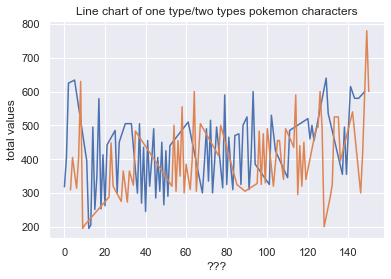

In [131]:
#3??????????
#plot pie(or Line) chart of the only one type
onlytype2.base_total.plot()
onlytype1.base_total.plot()

plt.title('Line chart of one type/two types pokemon characters')
plt.xlabel('???')
plt.ylabel('total values')
 

In [132]:
#4????????
#then compare 
print(sc.stats.ttest_ind(onlytype1.total,onlytype2.total))
sc.stats.ttest_ind(allgentype1.total,allgentype2.total)

Ttest_indResult(statistic=-0.8796089051707912, pvalue=0.38048763695778676)


Ttest_indResult(statistic=-4.383170789740527, pvalue=1.3258212170067869e-05)

3. Linear model with different stats to do projection of same function (eg. we choose attack/defense) 

   Now we already figured out how the types affect Pokemon performance in each generation. 
   We try to predict the eighth generation (already exist tho) whether their percentage of attack increase.

The difference between stats of each Pokemon in each generation is not significant (gen 1- 7). However difference between Lendary and non-legendary should be (We explain why later on)! In this part we attempt to create a machine learning model that will guess if given purely just the stats of any pokemon, it will determine if it is truly Legendary. To create this model we need complete several steps: 

- First create an edited data dataframe, so our model can easily read the necessary stats of each pokemon 
- Second, we need to split our dataframe's values into trainable and testable sets of data for our model
- Last, create our model and evaluate if it can truly guess if a pokemon is legendary or not 

In [133]:
#Creation of data frame, and editing of dataframe to be usuable by our model.

df1=pd.DataFrame(Pokemon).fillna(0)

#Dropping all non-related Pokemon perfomance stats. 

X_L = df1.drop(columns=['pokedex_number','name','type1', 'type2','is_legendary','abilities','against_bug','against_dark','against_dragon',	'against_electric',	'against_fairy',	'against_fight',	'against_fire',	'against_flying',	'against_ghost','generation','japanese_name','against_grass',	'against_ground',	'against_ice',	'against_normal',	'against_poison',	'against_psychic',	'against_rock',	'against_steel'
, 'against_water','base_egg_steps','base_happiness','capture_rate','experience_growth','percentage_male','classfication','total'])
Y_L = df1["is_legendary"]

In [134]:

from sklearn.model_selection import train_test_split

#Train test split 
X_train, X_test, y_train,y_test = train_test_split(X_L.values,Y_L.values)
print("Successful Split")

Successful Split


In [135]:



from sklearn.ensemble import RandomForestClassifier as RF
#Create Model 

clf = RF(bootstrap=True)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

#clf.predict(np.array([[120,600,75,3,88,100,75,142,50]]))[0] == 1


0.945273631840796

In [136]:
# web scrap and create the 8th generation dataset + explain


## Only run this once because it creates a csv file that we manually had to edit 
from urllib.request import Request,urlopen 
from bs4 import BeautifulSoup as soup
import csv
import requests
import lxml




my_url= 'https://pokemondb.net/pokedex/stats/gen8'



req = Request(my_url,headers={'User-Agent': 'Mozilla/5.0'})
webpage_html = urlopen(req).read()
urlopen(req).close()
page_soup = soup(webpage_html,"html.parser")
#page_soup.table
table = page_soup.find("table",{"class":"data-table"})

rows = table.findAll('tr')

headers = rows[0]
header_text = []

# add the table header text to array
for th in headers.findAll('th'):
    header_text.append(th.text)

# init row text array
row_text_array = []

# loop through rows and add row text to array
for row in rows[1:]:
    row_text = []
    # loop through the elements
    for row_element in row.findAll(['th', 'td']):
        # append the array with the elements inner text
        row_text.append(row_element.text.replace('\n', '').strip())
    # append the text array to the row text array
    row_text_array.append(row_text)

with open("PokemonGen8.csv", "w") as f:
    wr = csv.writer(f)
    wr.writerow(header_text)
    for row_text_single in row_text_array:
        wr.writerow(row_text_single) 






PermissionError: [Errno 13] Permission denied: 'PokemonGen8.csv'

In [ ]:
# cleaning data 

Pokemongen8 = pd.read_csv("./PokemonGen8.csv") 

df8 = pd.DataFrame(Pokemongen8)

df8=df8.drop(["Unnamed: 10"], axis=1)


df8=df8.dropna(how="all")

df8




,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,is_legendary
1,52.0,Meowth Galarian Meowth,Steel,290.0,50.0,65.0,55.0,40.0,40.0,40.0,0.0
3,77.0,Ponyta Galarian Ponyta,Psychic,410.0,50.0,85.0,55.0,65.0,65.0,90.0,0.0
5,78.0,Rapidash Galarian Rapidash,Psychic Fairy,500.0,65.0,100.0,70.0,80.0,80.0,105.0,0.0
7,79.0,Slowpoke Galarian Slowpoke,Psychic,315.0,90.0,65.0,65.0,40.0,40.0,15.0,0.0
9,80.0,Slowbro Galarian Slowbro,Poison Psychic,490.0,95.0,100.0,95.0,100.0,70.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
229,896.0,Glastrier,Ice,580.0,100.0,145.0,130.0,65.0,110.0,30.0,1.0
231,897.0,Spectrier,Ghost,580.0,100.0,65.0,60.0,145.0,80.0,130.0,1.0
233,898.0,Calyrex,Psychic Grass,500.0,100.0,80.0,80.0,80.0,80.0,80.0,1.0
235,898.0,Calyrex Ice Rider,Psychic Ice,680.0,100.0,165.0,150.0,85.0,130.0,50.0,1.0


### Linear regression (need some edit.... )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = Pokemon.iloc[:, 33].values.reshape(-1,1) #sp_attack
y = Pokemon.iloc[:,34].values #sp_defense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

w_0 = regressor.intercept_
w_1 = regressor.coef_
print('Interception : ', w_0)
print('Coeficient : ', w_1)


# sp_defense = 0.45* sp_attack + 38.65 

Interception :  38.65466117361639
Coeficient :  [0.45199567]


In [ ]:
score = regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.24156740355004558
Accuracy: 24.15674035500456%


In [ ]:
y_pred = regressor.predict(X_test)
print('Predict : ', y_pred)

Predict :  [ 99.67407602 104.19403268  58.99446612  95.15411937  45.43459616
  45.43459616  74.81431442  79.33427107 110.97396766  74.81431442
  97.4140977   56.7344878   56.7344878   68.03437943  74.81431442
  49.95455281  66.22639677  83.85422773  71.19834909  77.97828408
  83.85422773  65.77440111  73.91032309  72.55433609  99.67407602
  65.77440111  72.55433609  74.81431442  63.51442278  86.11420606
  61.25444445  54.47450947  92.89414104  70.29435776  49.95455281
  54.92650513  56.7344878   81.5942494   83.85422773  89.27817572
  65.32240544  88.37418438  77.97828408  52.21453114  74.81431442
  90.63416271  68.03437943  56.7344878   65.77440111  80.2382624
  86.11420606  81.5942494   77.07429275  63.51442278  54.47450947
  56.7344878   83.85422773  79.33427107  63.06242711  68.03437943
  95.15411937  65.77440111  92.89414104  56.7344878   79.33427107
  49.95455281  61.25444445  77.07429275  63.51442278  54.47450947
  63.51442278  63.96641844  81.5942494   58.99446612  74.81431442


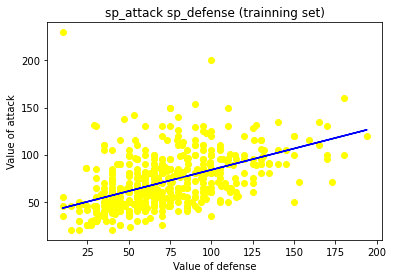

In [ ]:
plt.scatter(X_train, y_train, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('sp_attack sp_defense (trainning set)')
plt.xlabel("Value of defense") # im not sure
plt.ylabel("Value of attack") #
plt.show()

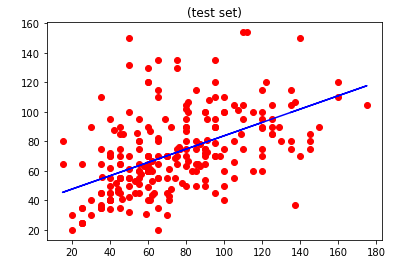

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('(test set)')
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

In [137]:
from sklearn import datasets

#df = Pokemon.DataFrame(data, columns = ['hp', 'speed', 'weight_kg'])
import random
#r = random.random()
#b = random.random()
#g = random.random()
colors = np.random.rand(801)

fig, ax = plt.subplots()
ax.scatter(x=Pokemon['hp'],y=Pokemon['speed'],c=colors, )
ax.set_xlabel('hp')
ax.set_ylabel('speed')

for idx, row in df.iterrows():
    ax.annotate(row['weight_kg'], (row['Age'], row['speed']) )
plt.show()

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

# lasso ?

In [ ]:
#lasso(base_total, speed, hp)

cols_selected = ['base_total', 'speed','hp']
Pokemon[cols_selected].head()


,base_total,speed,hp
0,318,45,45
1,405,60,60
2,625,80,80
3,309,65,39
4,405,80,58


In [ ]:
X = Pokemon[cols_selected].iloc[:,0:2].values # features matrix 
y = Pokemon[cols_selected]['speed'].values 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                      test_size=0.4, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_y = StandardScaler()
sc_x = StandardScaler()
y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alpha = np.linspace(0.01,0.4,10)
r2_train =[]
r2_test =[]
norm = []
alpha = np.linspace(0.01,0.4,10)
for i in range(10):
    lasso = Lasso(alpha = alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std = lasso.predict(X_train_std)
    y_test_std = lasso.predict(X_test_std)
    r2_train = np.append(r2_train,
              r2_score(y_train,sc_y.inverse_transform(y_train_std)))
    r2_test = np.append(r2_test,
              r2_score(y_test,sc_y.inverse_transform(y_test_std)))
    norm = np.append(norm,np.linalg.norm(lasso.coef_))

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


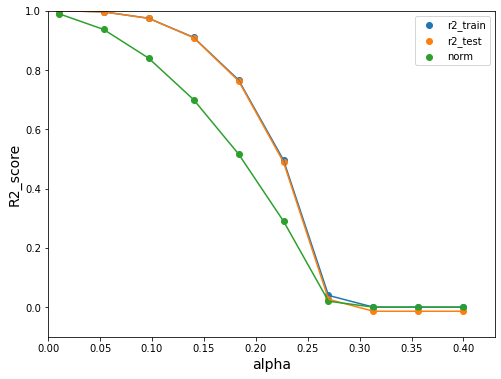

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'normal')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha', size = 14)
plt.ylabel('R2_score',size = 14)
plt.legend()
plt.show()

We observed that as the regularization parameter alpha increases, the norm of the regression coefficient becomes smaller and smaller. This means that more regression coefficients are forced to zero, which increases the bias (oversimplification of the model). When α is kept low, it is the best balance between deviation and variance.

### multiple linear regression 

In [ ]:
# use multiple regression to predict the ['speed'] value of the 8th generation

from sklearn import linear_model

features = ['sp_attack','sp_defense','hp','attack','defense']
target = 'speed'

X = Pokemon[features].values.reshape(-1, len(features))
y = Pokemon[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
model.coef_
model.intercept_
model.score(X, y)

#sp_attack =  65
#sp_defense = 65
#hp = 45
#speed = 45
#attack = 49
#defense= 49

x_pred = np.array([40, 30, 28, 60, 30])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([61.16098212])

### Radar chart

In [ ]:
pip install soccerplots

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install soccerplots
#reference 

from soccerplots.radar_chart import Radar

temp=['name','sp_attack','sp_defense','attack','defense','hp','speed',]

for i in range(len(temp)):
    df=Pokemon[temp]

df=df[(df['name']=='Pikachu')|(df['name']=='Hypno')].reset_index()
df=df.drop(['index'],axis=1)
params=list(df.columns)
params=params[1:]
ranges=[]
a_value=[]
b_value=[] #create an empty list

for x in params:
    a=min(df[params][x])
    a=a-(a*0.25)
    
    b=max(df[params][x])
    b=b+(b*0.25)
    
    ranges.append((a,b))
    
for x in range(len(df['name'])):
    if df['name'][x]=='Pikachu':        
        a_values=df.iloc[x].values.tolist()
    if df['name'][x]=='Hypno':      
        b_values=df.iloc[x].values.tolist()
        
a_values=a_values[1:]
b_values=b_values[1:]

values=[a_values,b_values]

In [ ]:
title=dict(
    title_name='Pikachu',
    title_color='red',
    subtitle_name='type',
    subtitle_clor='red',
    title_name_2='Hypno',
    title_color_2='blue',
    subtitle_name_2='type',
    subtitle_clor_2='blue',
    title_fontsize=18,
    subtitle_fontsize=15   
)
endnote='endnote'

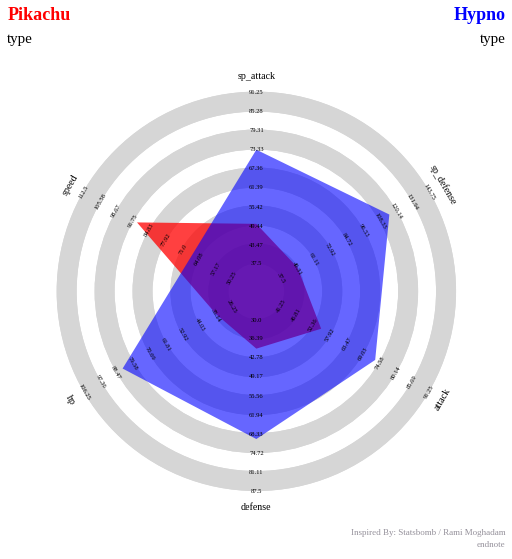

In [ ]:
radar=Radar()
fig, ax=radar.plot_radar(ranges=ranges, params=params,values=values, 
                        radar_color=['red','blue'],
                         alphas=[0.75,0.6], title=title, endnote=endnote,
                         compare=True)

### Random Forest 

In [ ]:
# random forest regression to predict  

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X=X_L.iloc[:,:-1]
y=X_L.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)

rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

8082.066940093881

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

89.90031668517014

### dec 19 New dataframe - "performance"

According to the offical pokemon website, Unfortunately, they said there is no explicit criteria which defines these Pokémon is legendary or not.
We want to use the machine learnings we have learned in this course, tring to predict whether the performance data is related to whether it is a legendary. (or proof how they do not have strong relationship).

In [ ]:
#set the dataframe

temp=pd.DataFrame(Pokemon).fillna(0)
pokemon_performance = temp.drop(columns=['pokedex_number','type1', 'type2','abilities','against_bug','against_dark','against_dragon','against_electric',
                                         'against_fairy','against_fight','against_fire','against_flying','against_ghost','generation','japanese_name','against_grass',
                                         'against_ground','against_ice','against_normal','against_poison','against_psychic','against_rock','against_steel', 'against_water',
                                         'base_egg_steps','base_happiness','capture_rate','experience_growth','percentage_male','classfication','total'])
pokemon_performance.set_index('name')
pokemon_performance_isleg=pd.DataFrame(pokemon_performance[pokemon_performance['is_legendary'] == 1])
pokemon_performance_isleg.index = pokemon_performance_isleg.index.values.astype(int)
pokemon_performance_isleg.set_index('name')

pokemon_performance_notleg=pd.DataFrame(pokemon_performance[pokemon_performance['is_legendary'] == 0])
pokemon_performance_notleg.index = pokemon_performance_notleg.index.values.astype(int)
pokemon_performance_notleg.set_index('name')



,attack,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary
name,,,,,,,,,,
Bulbasaur,49,318,49,0.7,45,65,65,45,6.9,0
Ivysaur,62,405,63,1.0,60,80,80,60,13.0,0
Venusaur,100,625,123,2.0,80,122,120,80,100.0,0
Charmander,52,309,43,0.6,39,60,50,65,8.5,0
Charmeleon,64,405,58,1.1,58,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...,...,...
Drampa,60,485,85,3.0,78,135,91,36,185.0,0
Dhelmise,131,517,100,3.9,70,86,90,40,210.0,0
Jangmo-o,55,300,65,0.6,45,45,45,45,29.7,0


([<matplotlib.patches.Wedge at 0x194440e23d0>,
 [Text(1.0955717233453064, 0.09860324034328485, 'Under 45'),
  Text(1.0603591463250979, 0.2926405317188817, '45-60'),
  Text(0.7601688963389246, 0.7950743669864231, '60-90'),
  Text(-0.7601689707791557, 0.7950742958142712, '90-110'),
  Text(0.16108004860727904, -1.1891396965624674, 'Over 110')],
 [Text(0.597584576370167, 0.05378358564179173, '2.86 %'),
  Text(0.578377716177326, 0.1596221082102991, '2.86 %'),
  Text(0.41463757982123156, 0.43367692744713987, '14.29 %'),
  Text(-0.41463762042499397, 0.4336768886259661, '34.29 %'),
  Text(0.09396336168757942, -0.6936648229947725, '45.71 %')])

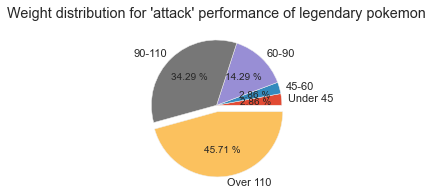

In [ ]:
#1
plt.style.use('ggplot')
light_attack =pokemon_performance_isleg.loc[pokemon_performance_isleg.attack < 45].count()[0]
lightmedian_attack= pokemon_performance_isleg.loc[(pokemon_performance_isleg.attack >= 45)&(pokemon_performance_isleg.attack < 60)].count()[0]
median_attack= pokemon_performance_isleg.loc[(pokemon_performance_isleg.attack >= 60)&(pokemon_performance_isleg.attack < 90)].count()[0]
medianheavy_attack = pokemon_performance_isleg.loc[(pokemon_performance_isleg.attack >= 90)&(pokemon_performance_isleg.attack < 110)].count()[0]
heavy_attack =pokemon_performance_isleg.loc[pokemon_performance_isleg.attack >= 110].count()[0]

attack_perf=[light_attack,lightmedian_attack, median_attack, medianheavy_attack, heavy_attack]
fig, ax = plt.subplots(figsize = (6,3))
labels=['Under 45','45-60','60-90','90-110','Over 110']
explode=(0,0,0,0,0.1)
plt.title("Weight distribution for 'attack' performance of legendary pokemon")
plt.pie(attack_perf, labels=labels, autopct='%.2f %%', explode=explode)

([<matplotlib.patches.Wedge at 0x1944415b1c0>,
 [Text(1.0057952886589099, 0.44539402478203555, '<45'),
  Text(0.15314236426764966, 1.0892875728045899, '45-60'),
  Text(-1.0970655092326054, -0.0802948843464163, '60-90'),
  Text(0.21372993760303968, -1.0790363820428859, '90-110'),
  Text(1.1794432640949635, -0.5467299029511906, '>110')],
 [Text(0.5486156119957689, 0.2429421953356557, '13.27 %'),
  Text(0.08353219869144525, 0.5941568578934125, '19.02 %'),
  Text(-0.5983993686723301, -0.04379720964349979, '37.76 %'),
  Text(0.11657996596529435, -0.5885652992961196, '16.14 %'),
  Text(0.7258112394430544, -0.33644917104688654, '13.82 %')])

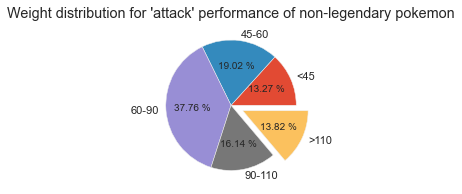

In [ ]:
light_attack_2 =pokemon_performance_notleg.loc[pokemon_performance_notleg.attack < 45].count()[0]
lightmedian_attack_2= pokemon_performance_notleg.loc[(pokemon_performance_notleg.attack >= 45)&(pokemon_performance_notleg.attack < 60)].count()[0]
median_attack_2= pokemon_performance_notleg.loc[(pokemon_performance_notleg.attack >= 60)&(pokemon_performance_notleg.attack < 90)].count()[0]
medianheavy_attack_2 = pokemon_performance_notleg.loc[(pokemon_performance_notleg.attack >= 90)&(pokemon_performance_notleg.attack < 110)].count()[0]
heavy_attack_2 =pokemon_performance_notleg.loc[pokemon_performance_notleg.attack >= 110].count()[0]

attack_perf_2=[light_attack_2,lightmedian_attack_2, median_attack_2, medianheavy_attack_2,heavy_attack_2]
fig, ax = plt.subplots(figsize = (6,3))
labels=['<45','45-60','60-90','90-110','>110']
explode=(0,0,0,0,0.2)
plt.title("Weight distribution for 'attack' performance of non-legendary pokemon")
plt.pie(attack_perf_2, labels=labels, autopct='%.2f %%',explode=explode)

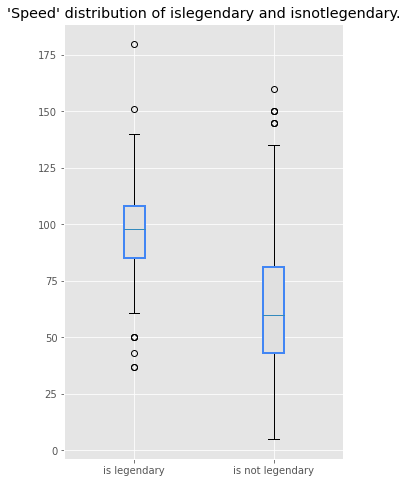

In [ ]:
#2
plt.figure(figsize=(5,8))
speed_isleg=pokemon_performance_isleg['speed']
speed_notleg=pokemon_performance_notleg['speed']
labels=['is legendary','is not legendary']

boxes= plt.boxplot([speed_isleg,speed_notleg], labels=labels, patch_artist=True)
plt.title("'Speed' distribution of islegendary and isnotlegendary.")

for box in boxes['boxes']:
    box.set(color='#4286f4',linewidth=2)
    
    box.set(facecolor='#e0e0e0')
    
plt.show()


In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
cols_selected = sns.load_dataset(cols_selected)

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

ValueError: '['base_total', 'speed', 'hp']' is not one of the example datasets.

### dec19


In [ ]:

#base_total, hp, spped
is_legend=pokemon_performance_isleg.iloc[:, lambda pokemon_performance_isleg: [1,4, 8]] 
isnot_legend=pokemon_performance_notleg.iloc[:, lambda pokemon_performance_isleg: [1,4, 8]]

#80%train, 20%test 
train , test =np.split(is_legend.sample(frac=1, random_state=42), [int(.8*len(is_legend))]) 
test

,base_total,hp,speed
792,570,109,103
639,580,91,108
487,600,120,85
645,700,125,95
796,570,97,61
144,580,90,100
720,600,80,70
479,580,75,95
145,580,90,90
481,580,75,115


In [ ]:
X_train, X_test, t_train,y_test=train_test_split(train[train.columns].values, train_type,
                                                test_size=0.3,
                                                random_state=1.
                                                stratify=train_type) 

SyntaxError: invalid syntax (Temp/ipykernel_16320/2972504607.py, line 4)

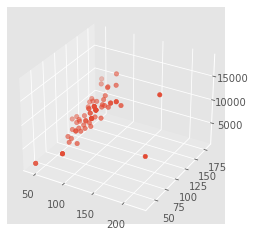

In [ ]:
from mpl_toolkits import mplot3d

ax=plt.axes(projection="3d")

x_data_isleg=pokemon_performance_isleg['hp']
y_data_isleg=pokemon_performance_isleg['speed']
z_data_isleg=x_data*y_data
                                 
ax.scatter(x_data_isleg,y_data_isleg,z_data_isleg)
plt.show()

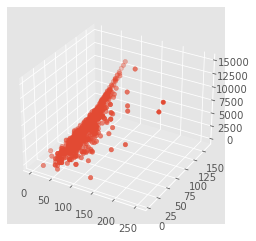

In [ ]:
ax=plt.axes(projection="3d")

x_data_notleg=pokemon_performance_notleg['hp']
y_data_notleg=pokemon_performance_notleg['speed']
z_data_notleg=x_data_notleg*y_data_notleg
                                 
ax.scatter(x_data_notleg,y_data_notleg,z_data_notleg)
plt.show()